## Stats507 Homework9, Winter 2019
### Shuoran Li
#### shuoranl@umich.edu

I did not discuss problems with anyone else in the class on this homework.

Problem 1 took me 2 hours; Problem 2 took me 2 hours

In [24]:
import math
import time
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import random

### Problem 1: Implementing a Basic Data Structure

### 1.1 
#### Define a class called a Trie

In [3]:
class Trie():
    def __init__(self):
        self.root = dict()
    def add_helper(self,s,d):
        if s == '':
            d[''] = None
        elif s[0] in d.keys():
            return(self.add_helper(s[1:],d[s[0]]))
        else:
            d[s[0]]=dict()
            return(self.add_helper(s[1:],d[s[0]]))
    def add(self,s):
        d = self.root
        self.add_helper(s,d)
    def contains_helper(self,s,d):
        if s == '':
            if s in d.keys():
                return True
            else:
                return False
        elif s[0] not in d.keys():
            return False
        else:
            return(self.contains_helper(s[1:],d[s[0]]))      
    def contains(self,s):
        d = self.root
        return(self.contains_helper(s,d))
    def __repr__(self):
        return(str(self.root))

### 1.2
#### Write a function called wordlist2trie that takes a list of strings as input and returns a Trie object representing the collection of strings in the input list. Your function should perform error checking to verify that the input is indeed a list and that all its elements are strings. 

In [2]:
def wordlist2trie(l):
    if not isinstance(l,list):
        raise TypeError('Input should be a list!')
    if not all(map(lambda x: isinstance(x,str),l)):
        raise TypeError('All elements in list should be string!')
    trie = Trie() # Initialize
    for s in l:
        trie.add(s)
    return(trie) 

### 1.3
#### Use wordlist2trie to build a trie representing the words in the word list. Save the result in a variable called big_trie.

In [4]:
f = open('words.txt','r')
word_list = [line.strip() for line in f]
f.close()
big_trie = wordlist2trie(word_list)

In [28]:
big_trie

{'a': {'a': {'': None, 'h': {'': None, 'e': {'d': {'': None}}, 'i': {'n': {'g': {'': None}}}, 's': {'': None}}, 'l': {'': None, 'i': {'i': {'': None, 's': {'': None}}}, 's': {'': None}}, 'r': {'d': {'v': {'a': {'r': {'k': {'': None, 's': {'': None}}}}}, 'w': {'o': {'l': {'f': {'': None}, 'v': {'e': {'s': {'': None}}}}}}}}, 's': {'': None, 'v': {'o': {'g': {'e': {'l': {'': None, 's': {'': None}}}}}}}}, 'b': {'a': {'': None, 'c': {'a': {'': None, 's': {'': None}}, 'i': {'': None}, 'k': {'': None}, 'u': {'s': {'': None, 'e': {'s': {'': None}}}}}, 'f': {'t': {'': None}}, 'k': {'a': {'': None, 's': {'': None}}}, 'l': {'o': {'n': {'e': {'': None, 's': {'': None}}}}}, 'm': {'p': {'': None, 'e': {'r': {'e': {'': None, 's': {'': None}}}}, 's': {'': None}}}, 'n': {'d': {'o': {'n': {'': None, 'e': {'d': {'': None}}, 'i': {'n': {'g': {'': None}}}, 'm': {'e': {'n': {'t': {'': None, 's': {'': None}}}}}, 's': {'': None}}}}}, 's': {'': None, 'e': {'': None, 'd': {'': None, 'l': {'y': {'': None}}}, 'm'

### Problem 2: Comparing Sorting Algorithms 

### 2.1
#### Implement functions called mergesort, quicksort and bubblesort, each of which takes as input a list of numbers (ints and/or floats) and returns the list with elements

In [29]:
def merge(left,right):
    '''helping function for mergesort'''
    result = list()
    
    while len(left) > 0 and len(right) > 0:
        if left[0] <= right[0]:
            result.append(left[0])
            left = left[1:]
        else:
            result.append(right[0])
            right = right[1:]
    while len(left)>0:
        result.append(left[0])
        left = left[1:]
    while len(right)>0:
        result.append(right[0])
        right = right[1:]
    return(result)

In [30]:
def mergesort(l):
    if not isinstance(l,list):
        raise TypeError('Input should be a list!')
    if not all(map(lambda x: isinstance(x,(int,float)),l)):
        raise TypeError('All elements in list should be int or float!')
    if len(l) <= 1:
        return l
    left = l[0:math.floor(len(l)/2)]
    right = l[math.floor(len(l)/2):]
    
    left = mergesort(left)
    right = mergesort(right)
    
    return(merge(left,right))
    

In [31]:
def quicksort(l):
    if not isinstance(l,list):
        raise TypeError('Input should be a list!')
    if not all(map(lambda x: isinstance(x,(int,float)),l)):
        raise TypeError('All elements in list should be int or float!')
    if len(l)<=1:
        return(l)
    (less,mid,more)=(list(),list(),list())
    pivot = l[-1]
    mid.append(l[-1])
    for i in range(len(l)-1):
        if l[i] == pivot:
            mid.append(l[i])
        elif l[i]<pivot:
            less.append(l[i])
        else:
            more.append(l[i])
    return(quicksort(less)+mid+quicksort(more))

In [32]:
def bubblesort(l):
    if not isinstance(l,list):
        raise TypeError('Input should be a list!')
    if not all(map(lambda x: isinstance(x,(int,float)),l)):
        raise TypeError('All elements in list should be int or float!')
    m = l[:]
    n = len(m)
    swapped = True
    while swapped == True:
        swapped = False
        for i in range(n-1):
            if m[i]>m[i+1]:
                a = m[i]
                m[i] = m[i+1]
                m[i+1] = a
                swapped = True
    return(m)

### 2.2
#### Write a function called run_timing_expt, which takes a list of numbers (ints and/or floats) as its only input. Calling this function should run each of the three sorting algorithms implemented in the previous subproblem on the given list, timing each call. The function should return a tuple of floats (t_merge,t_quick,t_bubble) corresponding to the times that it took to sort the input list with merge sort, quicksort and bubble sort, respectively.

In [33]:
def run_timing_expt(l):
    # Runtime for mergesort
    start_time_merge = time.time()
    mergesort(l)
    t_merge = time.time()-start_time_merge
    # Runtime for quicksort
    start_time_quick = time.time()
    quicksort(l)
    t_quick = time.time()-start_time_quick
    # Runtime for bubblesort
    start_time_bubble = time.time()
    bubblesort(l)
    t_bubble = time.time()-start_time_bubble
    
    return((t_merge,t_quick,t_bubble))
    

### 2.3
#### Now, we will use the functions defined in the previous two subproblems to ex- plore the behavior of these three sorting algorithms on different kinds of input lists. First, let’s see what happens when we pass an already-sorted list. For n = 500,1000,1500,2000,2500, call run_timing_expt(list(range(n))) twenty times. Make a plot that shows the average runtime of the three sorting algorithms as a function of the input size n. Please include error bars in your plot indicating 2 standard errors of the mean. Give your plot an appropriate title, and label the axes. Save your plot as ascending.pdf and include it in your submission. Note that if you call quicksort on an already-sorted list of size much larger than 2500 you will encounter a recursion depth error (assuming that you are running with the default maximum recursion depth of 5000). Why is this the case? Under more realistic conditions, this would cause quicksort to be slow. In this case, it simply causes quicksort to be unusable for even moderately large inputs.

In [34]:
mean_time = np.empty([5,3])
std_time = np.empty([5,3])
n_list = [500,1000,1500,2000,2500]
for n in n_list:
    t_merge_list = list()
    t_quick_list = list()
    t_bubble_list = list()
    for i in range(20):
        time_all = run_timing_expt(list(range(n)))
        t_merge_list.append(time_all[0])
        t_quick_list.append(time_all[1])
        t_bubble_list.append(time_all[2])
    mean_time[int(n/500)-1,:] = [np.mean(t_merge_list),np.mean(t_quick_list),np.mean(t_bubble_list)]
    std_time[int(n/500)-1,:] = [np.std(t_merge_list),np.std(t_quick_list),np.std(t_bubble_list)]


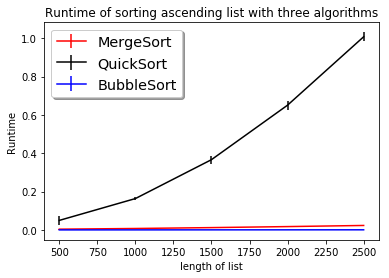

In [35]:
std_time_2 = 2*std_time

fig, ax = plt.subplots()
ax.errorbar(n_list, mean_time[:,0], yerr=std_time_2[:,0],color='red',label = 'MergeSort')
ax.errorbar(n_list, mean_time[:,1], yerr=std_time_2[:,1],color='black',label = 'QuickSort')
ax.errorbar(n_list, mean_time[:,2], yerr=std_time_2[:,2],color='blue',label = 'BubbleSort')
legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.ylabel('Runtime')
plt.xlabel('length of list')
title = plt.title('Runtime of sorting ascending list with three algorithms')
plt.show()
fig.savefig("ascending.pdf", bbox_inches='tight')

### Because we set last number which is the largest as the pivot, so we need to split the list n times. For each time we need to do 2 recursions. So that if n is bigger than 2500, the recursion depth would reach more than 5000, the maximum depth.

### 2.4
#### Run the same experiment, but this time with the input being a list sorted in de- scending order. That is, you should run twenty trials of run_timing_expt(sorted(list(range(n)), reverse=True)) for n = 500, 1000, 1500, 2000, 2500. Again make a plot summarizing the results and including an appropriate title and axis labels. Please include error bars in your plot indicating 2 standard errors of the mean. Save your plot as descending.pdf and include it in your submission.

In [40]:
mean_time = np.empty([5,3])
std_time = np.empty([5,3])
n_list = [500,1000,1500,2000,2500]
for n in n_list:
    t_merge_list = list()
    t_quick_list = list()
    t_bubble_list = list()
    for i in range(20):
        time_all = run_timing_expt(sorted(list(range(n)),reverse=True))
        t_merge_list.append(time_all[0])
        t_quick_list.append(time_all[1])
        t_bubble_list.append(time_all[2])
    mean_time[int(n/500)-1,:] = [np.mean(t_merge_list),np.mean(t_quick_list),np.mean(t_bubble_list)]
    std_time[int(n/500)-1,:] = [np.std(t_merge_list),np.std(t_quick_list),np.std(t_bubble_list)]

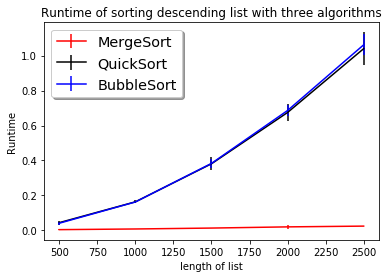

In [41]:
std_time_2 = 2*std_time

fig, ax = plt.subplots()
ax.errorbar(n_list, mean_time[:,0], yerr=std_time_2[:,0],color='red',label = 'MergeSort')
ax.errorbar(n_list, mean_time[:,1], yerr=std_time_2[:,1],color='black',label = 'QuickSort')
ax.errorbar(n_list, mean_time[:,2], yerr=std_time_2[:,2],color='blue',label = 'BubbleSort')
legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.ylabel('Runtime')
plt.xlabel('length of list')
title = plt.title('Runtime of sorting descending list with three algorithms')
plt.show()
fig.savefig("descending.pdf", bbox_inches='tight')

### 2.5
####   Run the same experiment, but this time on random inputs. That is, for each value of n in the previous subproblem, run 20 independent trials of run_timing_expt([random.random() for _ in range(n)]) Again make a plot summarizing the results and including an appropriate title and axis labels. Please include error bars in your plot indicating 2 standard errors of the mean. Save your plot as random.pdf and include it in your submission.

In [38]:
mean_time = np.empty([5,3])
std_time = np.empty([5,3])
n_list = [500,1000,1500,2000,2500]
for n in n_list:
    t_merge_list = list()
    t_quick_list = list()
    t_bubble_list = list()
    for i in range(20):
        time_all = run_timing_expt([random.random() for _ in range(n)])
        t_merge_list.append(time_all[0])
        t_quick_list.append(time_all[1])
        t_bubble_list.append(time_all[2])
    mean_time[int(n/500)-1,:] = [np.mean(t_merge_list),np.mean(t_quick_list),np.mean(t_bubble_list)]
    std_time[int(n/500)-1,:] = [np.std(t_merge_list),np.std(t_quick_list),np.std(t_bubble_list)]

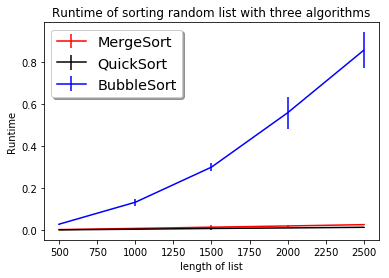

In [39]:
std_time_2 = 2*std_time

fig, ax = plt.subplots()
ax.errorbar(n_list, mean_time[:,0], yerr=std_time_2[:,0],color='red',label = 'MergeSort')
ax.errorbar(n_list, mean_time[:,1], yerr=std_time_2[:,1],color='black',label = 'QuickSort')
ax.errorbar(n_list, mean_time[:,2], yerr=std_time_2[:,2],color='blue',label = 'BubbleSort')
legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.ylabel('Runtime')
plt.xlabel('length of list')
title = plt.title('Runtime of sorting random list with three algorithms')
plt.show()
fig.savefig("random.pdf", bbox_inches='tight')